# Lets understand how the algorithm works:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helperFunctions import *

# Step 0: Create the Data

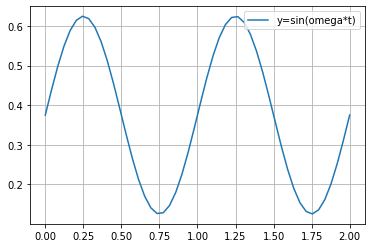

In [2]:
T=1 #[s]
omega=2*np.pi/T
k=2

t = np.linspace(0, k*T, k*25)
y = np.sin(omega*t)
y = (y + 1.5)/4


ax = plt.axes()
line, = ax.plot(t,y)
line.set_label('y=sin(omega*t)')
ax.grid(); ax.legend()

In [3]:
print('y =  ')
print(y)

y =  
[0.375      0.43841365 0.49767939 0.54892064 0.58878569 0.61466696
 0.62487155 0.61873198 0.59664983 0.5600695  0.51138373 0.45377705
 0.39101755 0.32721034 0.26652907 0.2129429  0.16995694 0.14038289
 0.12615522 0.12820455 0.14639684 0.17954213 0.22547237 0.28118325
 0.34303071 0.40696929 0.46881675 0.52452763 0.57045787 0.60360316
 0.62179545 0.62384478 0.60961711 0.58004306 0.5370571  0.48347093
 0.42278966 0.35898245 0.29622295 0.23861627 0.1899305  0.15335017
 0.13126802 0.12512845 0.13533304 0.16121431 0.20107936 0.25232061
 0.31158635 0.375     ]


# Step 1: Convert Data to Binary

In [4]:
fmap=map(decimalToBinary, y) #tau chosen to be 12
for x in fmap:
    print(x)

011000000000
011100000011
011111110110
100011001000
100101101011
100111010101
100111111111
100111100110
100110001011
100011110110
100000101110
011101000010
011001000001
010100111100
010001000011
001101101000
001010111000
001000111111
001000000100
001000001101
001001010111
001011011111
001110011011
010001111111
010101111101
011010000010
011110000000
100001100100
100100100000
100110101000
100111110010
100111111011
100111000000
100101000111
100010010111
011110111100
011011000011
010110111110
010010111101
001111010001
001100001001
001001110100
001000011001
001000000000
001000101010
001010010100
001100110111
010000001001
010011111100
010111111111


# Step 2: Chain Binary Data to a String $[b(y_0), b(y_1) ...b(y_n)]$

In [5]:
binaryInitial = ''.join(map(decimalToBinary, y))

necessaryPrecision = len(binaryInitial)
assert tau * len(y) == necessaryPrecision

print('binaryInitial = %s\n' % binaryInitial)

print('number of bits = %d' % len(binaryInitial))

binaryInitial = 011000000000011100000011011111110110100011001000100101101011100111010101100111111111100111100110100110001011100011110110100000101110011101000010011001000001010100111100010001000011001101101000001010111000001000111111001000000100001000001101001001010111001011011111001110011011010001111111010101111101011010000010011110000000100001100100100100100000100110101000100111110010100111111011100111000000100101000111100010010111011110111100011011000011010110111110010010111101001111010001001100001001001001110100001000011001001000000000001000101010001010010100001100110111010000001001010011111100010111111111

number of bits = 600


# Step 3: Convert string of binaries to initial $ \alpha_0 \simeq y_0 $

In [6]:
mp.prec = necessaryPrecision 
print('significance = %d bits ; %d digits (base-10) ; ratio = %.3f\n' % (mp.prec, mp.dps, mp.prec / mp.dps))

decimalInitial = binaryToDecimal(binaryInitial)
print('decimalInitial = %s\n' % decimalInitial)

print('number of decimal digits = %d' % len(str(decimalInitial)))

significance = 600 bits ; 180 digits (base-10) ; ratio = 3.333

decimalInitial = 0.375107020002163653675740609313832531010832082831024254550327233328017826313224694008300547841445274675543479379087172241761141051553380366724121541714114356423529781329947701413107

number of decimal digits = 182


# Step 4: Decode data with the Dyadic decoder </br> $$ y_{k+1} \simeq \alpha_{k+1} = mod(\alpha_0 2^{\tau k},1) $$

In [7]:
yhat = [float(dyadicDecoder(decimalInitial, _)) for _ in range(len(y))]

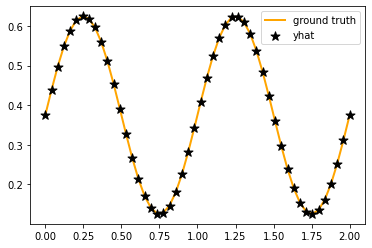

In [8]:
line, = plt.plot(t, y, color='orange', lw=2, zorder=1)
line.set_label('ground truth')
sct=plt.scatter(t, yhat, color='black', marker='*', s=90, zorder=2)
sct.set_label('yhat')
plt.legend()

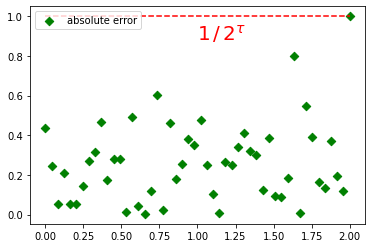

In [9]:
normalizedErrors_dyadic = np.array([abs(decodedValue - dataPoint) / (1 / 2 ** tau) 
                    for decodedValue, dataPoint in zip(yhat, y)])
sct = plt.scatter(t, normalizedErrors_dyadic, color='green', marker='D')
sct.set_label('absolute error')
plt.hlines(1, 0, T*k, color='red', linestyle='dashed')

plt.text(T*k/2, 0.88, r'$1 \, / \, 2^\tau$', fontsize=20, color='r')
plt.legend()